# Auto MPG

## 1. Business Understanding

Tahap ini bertujuan untuk memahami latar belakang permasalahan serta tujuan analisis yang akan dilakukan.

Latar Belakang:

Efisiensi bahan bakar kendaraan menjadi salah satu aspek penting dalam industri otomotif. Dataset Auto MPG berisi informasi karakteristik kendaraan seperti jumlah silinder, berat kendaraan, dan tahun produksi, serta nilai Miles Per Gallon (MPG) sebagai indikator efisiensi bahan bakar.

Permasalahan:
1. Bagaimana perbedaan rata-rata MPG berdasarkan Cylinders?
2. Bagaimana hubungan anatara Weight dan MPG?
3. Bagaimana tren rata-rata MPG dari tahun ke tahun?

Tujuan:
1. Menganlisis perbedaan rata-rata MPG berdasarkan Cyinders
2. Menganalisis hubungan antara Weight dan MPG
3. Mengidentifikasi tren rata-rata MPG dari tahun ke tahun

## 2. Data Understanding

Tahap ini bertujuan untuk memahami struktur, karakteristik, dan kondisi awal dataset sebelum dilakukan proses pembersihan data.

Informasi Dataset: Dataset "Auto MPG" adalah kumpulan data klasik yang isinya adalah 398 catatan mobil dari era 70-an hingga awal 80-an.  Tujuan utamanya adalah untuk memprediksi seberapa irit sebuah mobil (dilihat dari nilai mpg atau miles per gallon) dengan menggunakan berbagai atribut teknisnya. Total ada 9 atribut. Selain mpg yang menjadi target tebakan, datasetnya punya fitur-fitur penting seperti jumlah silinder (cylinders), kapasitas mesin (displacement), tenaga mesin (horsepower), berat kendaraan (weight), dan akselerasi (acceleration). Data lain seperti tahun produksi (model_year) dan asal negara (origin - USA, Eropa, atau Jepang) juga tersedia. Ada juga kolom car_name (Nama kendaraan).

Sumber Dataset : UCI Machine Learning Repository

Pada tahap ini, dilakukan pengecekan beberapa aspek penting seperti:

* Missing values atau nilai kosong
* Duplikasi data
* Tipe data pada setiap kolom

In [1]:
import pandas as pd
import numpy as np

In [2]:
# URL untuk dataset asli
url_original = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'

# Nama kolom (sama seperti sebelumnya)
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin', 'car_name']

# Membaca dataset asli
# na_values="NA" digunakan untuk menandai nilai yang hilang di file asli
df_original = pd.read_csv(url_original, names=column_names,
                          na_values="NA", comment='\t',
                          sep='\s+', skipinitialspace=True)

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2887432560.py:12: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', skipinitialspace=True)


In [3]:
df_original.head()
df_original.info()
df_original.isnull().sum()
df_original['origin'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


array([1., 2., 3.])

## 3. Data Preparation

Tahap ini bertujuan untuk membersihkan dan mentransformasikan data agar siap digunakan pada tahap analisis eksploratif.

In [4]:
df_original.to_csv('auto_mpg.csv', index=False)

In [5]:
df_original[['car_name']].to_csv('car_name_only.csv', index=False)

In [6]:
df_original[['mpg']].to_csv('auto_mpg_targets.csv', index=False)

In [7]:
features = df_original.drop(columns=['mpg', 'car_name'])
features.to_csv('auto_mpg_features.csv', index=False)

In [8]:
# 1. Baca ketiga file CSV
features = pd.read_csv('/content/auto_mpg_features.csv')
targets = pd.read_csv('/content/auto_mpg_targets.csv')
car_names = pd.read_csv('/content/car_name_only.csv')

In [9]:
# 2. Gabungkan ketiganya secara horizontal (berdampingan)
df_combined = pd.concat([features, targets, car_names], axis=1)

In [10]:
# 3. Urutkan kolom sesuai gambar
ordered_columns = ['displacement', 'mpg', 'cylinders', 'horsepower',
                   'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df_combined = df_combined[ordered_columns]

In [11]:
df_combined.isnull().sum()


,0
displacement,0
mpg,8
cylinders,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [12]:
df_combined.shape

(406, 9)

In [13]:
df_combined.dropna(inplace=True)

In [14]:
df_combined.isnull().sum()

,0
displacement,0
mpg,0
cylinders,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [15]:
df_combined.shape

(392, 9)

In [16]:
df_combined.to_csv('auto_mpg_clean.csv', index=False)

In [17]:
avg_mpg_cyl = df_combined.groupby('cylinders')['mpg'].mean()
avg_mpg_cyl


,mpg
cylinders,
3.0,20.550000
4.0,29.283920
5.0,27.366667
6.0,19.973494
8.0,14.963107


## 4. EDA

Tahap ini bertujuan untuk mengeksplorasi data yang telah dibersihkan guna mengidentifikasi pola, tren, dan insight yang relevan. Temuan dari tahap EDA digunakan sebagai dasar dalam menjawab pertanyaananalisis yang telah dirumuskan sebelumnya.

### Pertayaan 1
Bagaimana perbedaan rata-rata MPG berdasarkan Cylinders?

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df_combined = df_combined.dropna().copy()

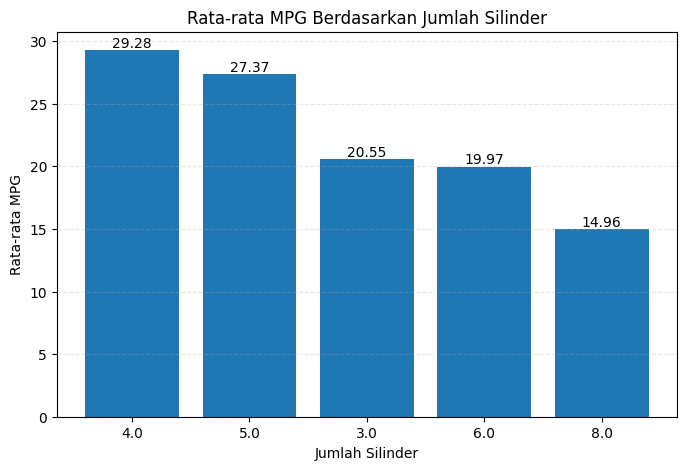

In [20]:
# Hitung rata-rata MPG per cylinder
avg_mpg_cyl = (
    df_combined.groupby('cylinders')['mpg']
    .mean()
    .sort_values(ascending=False)  # URUT DARI TERTINGGI
)

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_mpg_cyl.index.astype(str), avg_mpg_cyl.values)

plt.title('Rata-rata MPG Berdasarkan Jumlah Silinder')
plt.xlabel('Jumlah Silinder')
plt.ylabel('Rata-rata MPG')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Tambahkan label angka di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',        # 2 angka desimal
        ha='center',
        va='bottom'
    )

plt.show()

Insight:

Semakin banyak jumlah silinder, rata-rata MPG semakin rendah, namun efisiensi bahan bakar juga dipengaruhi oleh faktor lain seperti berat kendaraan dan horsepower.

### Pertanyaan 2
Bagaimana hubungan anatara Weight dan MPG?

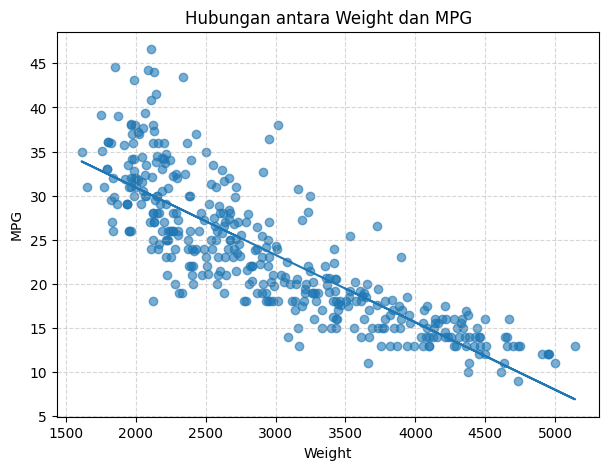

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(df_combined['weight'], df_combined['mpg'], alpha=0.6)

m, b = np.polyfit(df_combined['weight'], df_combined['mpg'], 1)
plt.plot(df_combined['weight'], m*df_combined['weight'] + b)

plt.title('Hubungan antara Weight dan MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Insight:

Terdapat hubungan negatif antara berat kendaraan dan MPG. Semakin berat kendaraan, semakin rendah nilai MPG, yang berarti efisiensi bahan bakar menurun.

### Pertanyaan 3
Bagaimana tren rata-rata MPG dari tahun ke tahun?

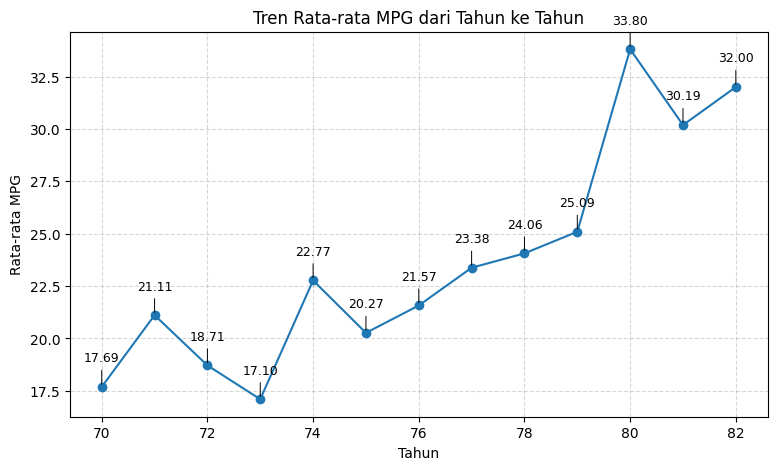

In [22]:
avg_mpg_per_year = df_combined.groupby('model_year')['mpg'].mean()

plt.figure(figsize=(9,5))
plt.plot(avg_mpg_per_year.index, avg_mpg_per_year.values, marker='o')

for x, y in zip(avg_mpg_per_year.index, avg_mpg_per_year.values):
    plt.annotate(
        f'{y:.2f}',
        xy=(x, y),
        xytext=(x, y + 1.2),
        arrowprops=dict(arrowstyle='-', lw=0.7),
        ha='center',
        fontsize=9
    )

plt.title('Tren Rata-rata MPG dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata MPG')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Insight:

Rata-rata MPG menunjukkan tren meningkat dari 1970 hingga 1982, yang menandakan bahwa kendaraan semakin efisien seiring dengan perkembangan teknologi dan regulasi hemat bahan bakar.